=== BEFORE TRAFFIC ===
Vehicles on B → C and B → F: 6, α: 0.76, time: 16.7 min
Shortest path from A to J: A → B → C → D → E → J
Total time: 29.7 minutes


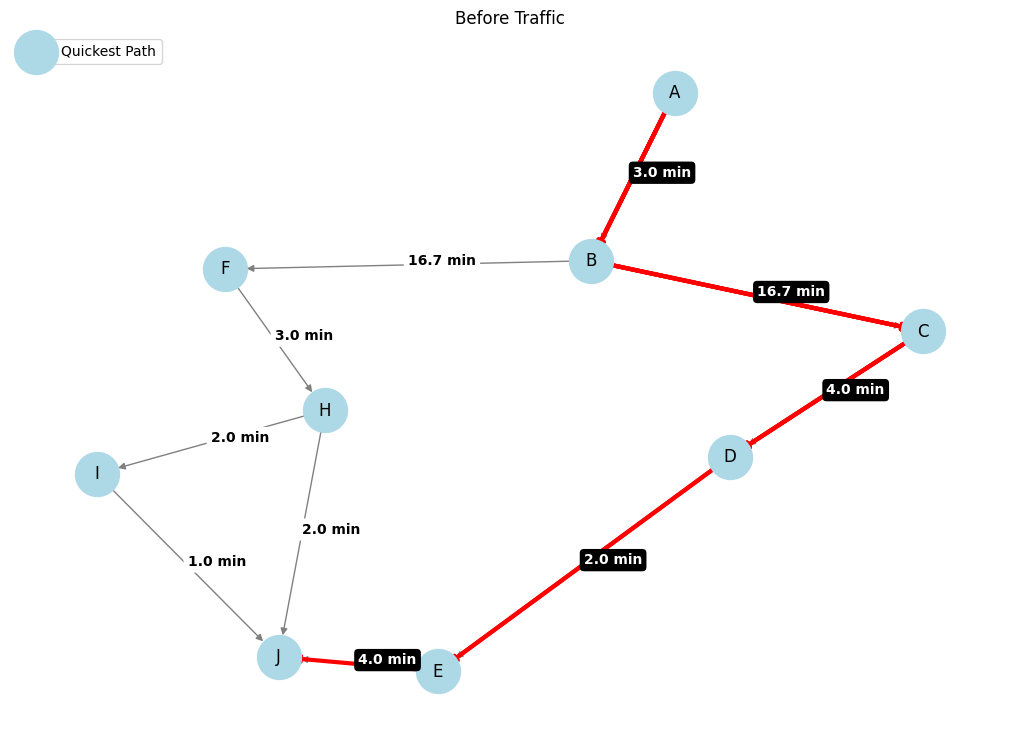


=== AFTER TRAFFIC ===
Vehicles on B → C and B → F: 5, α: 0.60, time: 12.1 min
Shortest path from A to J: A → B → F → H → I → J
Total time: 21.1 minutes


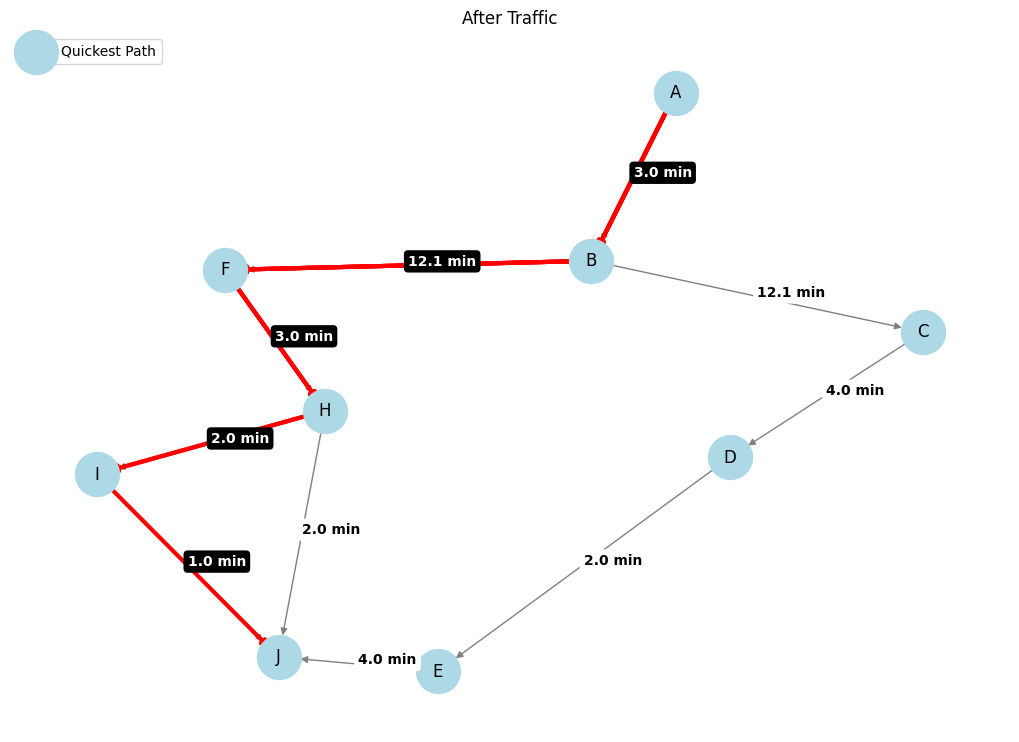

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def create_graph():
    G = nx.DiGraph()
    G.add_weighted_edges_from([
        ("A", "B", 3),
        ("B", "C", 2),
        ("B", "F", 2),
        ("C", "D", 4),
        ("F", "H", 3),
        ("D", "E", 2),
        ("E", "J", 4),
        ("H", "I", 2),
        ("H", "J", 2),
        ("I", "J", 1),
    ])
    return G

def adjust_travel_time(base_time, num_vehicles, alpha):
    return base_time * (1 + alpha * num_vehicles)

def determine_alpha(vehicles):
    if vehicles < 5:
        return np.random.uniform(0.1, 0.5)
    elif 5 <= vehicles <= 10:
        return np.random.uniform(0.5, 1.0)
    else:
        return np.random.uniform(1.0, 2.0)

def update_edge_weight(G, u, v, new_weight):
    G[u][v]['weight'] = new_weight

def dijkstra(G, source):
    times = {}
    paths = {}
    queue = [(0, source, [])]

    while queue:
        queue.sort()
        current_time, node, path = queue.pop(0)

        if node in times:
            continue

        times[node] = current_time
        paths[node] = path + [node]

        neighbors = list(G[node].items())
        if not neighbors:
            continue

        min_weight = min(attr['weight'] for _, attr in neighbors)
        min_neighbors = [(n, attr) for n, attr in neighbors if attr['weight'] == min_weight]

        neighbor, attr = random.choice(min_neighbors)
        new_time = current_time + attr['weight']
        queue.append((new_time, neighbor, paths[node]))

    return times, paths

def visualize_graph(G, paths, adjusted_weights, title):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, edge_color='gray')

    edge_labels = {edge: f"{adjusted_weights[edge]:.1f} min" for edge in G.edges}

    selected_edges = []
    for node in paths:
        if node != "A":
            path_edges = list(zip(paths[node], paths[node][1:]))
            selected_edges.extend(path_edges)
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="red")

    for edge, label in edge_labels.items():
        color = "white" if edge in selected_edges else "black"
        plt.text((pos[edge[0]][0] + pos[edge[1]][0]) / 2,
                 (pos[edge[0]][1] + pos[edge[1]][1]) / 2,
                 label,
                 fontsize=10, fontweight='bold', color=color,
                 bbox=dict(facecolor='black' if color == 'white' else 'white', edgecolor='none', boxstyle='round,pad=0.3'))

    plt.title(title)
    plt.legend(["Quickest Path"], loc="upper left")
    plt.show()

G = create_graph()

base_time = 3
initial_vehicles = 6
alpha = determine_alpha(initial_vehicles)

adjusted_time = adjust_travel_time(base_time, initial_vehicles, alpha)
update_edge_weight(G, "B", "C", adjusted_time)
update_edge_weight(G, "B", "F", adjusted_time)

time_before, paths_before = dijkstra(G, "A")
print("=== BEFORE TRAFFIC ===")
print(f"Vehicles on B → C and B → F: {initial_vehicles}, α: {alpha:.2f}, time: {adjusted_time:.1f} min")

if "J" in paths_before:
    print("Shortest path from A to J:", " → ".join(paths_before["J"]))
    print(f"Total time: {time_before['J']:.1f} minutes")
else:
    print("J is not reachable from A in this run.")

visualize_graph(G, paths_before, nx.get_edge_attributes(G, 'weight'), "Before Traffic")

lambda_rate = 1.5
time_period = 5
new_vehicles = np.random.poisson(lambda_rate * time_period)
new_alpha = determine_alpha(new_vehicles)
new_adjusted_time = adjust_travel_time(base_time, new_vehicles, new_alpha)

update_edge_weight(G, "B", "C", new_adjusted_time)
update_edge_weight(G, "B", "F", new_adjusted_time)

time_after, paths_after = dijkstra(G, "A")
print("\n=== AFTER TRAFFIC ===")
print(f"Vehicles on B → C and B → F: {new_vehicles}, α: {new_alpha:.2f}, time: {new_adjusted_time:.1f} min")

if "J" in paths_after:
    print("Shortest path from A to J:", " → ".join(paths_after["J"]))
    print(f"Total time: {time_after['J']:.1f} minutes")
else:
    print("J is not reachable from A in this run.")

visualize_graph(G, paths_after, nx.get_edge_attributes(G, 'weight'), "After Traffic")
